In [91]:
    import os
    import sys
    import numpy as np
    import pandas as pd
    import sklearn.preprocessing as pp
    from sklearn.cross_validation import train_test_split
    from sklearn import svm, linear_model, naive_bayes
    import simplejson as json
    import matplotlib.pyplot as plt
    import matplotlib
    import seaborn as sns 
    sns.set()
    
    # Get training data
    df = pd.read_csv("pima-data.csv")
    
    # Prepare feature and result sets
    feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
    predicted_class_names = ['diabetes']

    x = df[feature_col_names].values
    y = df[predicted_class_names].values

    # Split data into train and test sets
    split_test_size = 0.20
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=73) 

    # Manipulate bad data
    fill_0 = pp.Imputer(missing_values=0, strategy="mean", axis=0)
    x_train = fill_0.fit_transform(x_train)
    scaler = pp.StandardScaler()

In [92]:
    # Train model - SVC
    def getSVCModel():
        global x_train
        global x_test
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.fit_transform(x_test)
        svc_model = svm.SVC(gamma=0.001,C=10000,kernel="rbf", probability=True)
        svc_model.fit(x_train, y_train.ravel()) 
        return svc_model

    # Train model - SVC Linear
    def getSVCLinearModel():
        global x_train
        global x_test
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.fit_transform(x_test)
        svc_model = svm.SVC(kernel="linear")
        svc_model.fit(x_train, y_train.ravel()) 
        return svc_model

    # Train model - NuSVC
    def getNuSVCModel():
        global x_train
        global x_test
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.fit_transform(x_test)
        nuSvc_model = svm.NuSVC(class_weight=None, coef0=0.0, gamma=0.1, kernel='rbf', 
          nu=0.47, probability=True, random_state=0)
        nuSvc_model.fit(x_train, y_train.ravel()) 
        return nuSvc_model

    # Train model - Logistic Regression
    def getLogisticRegressionModel():
        lr_model = linear_model.LogisticRegression()
        lr_model.fit(x_train, y_train.ravel())
        return lr_model


    model = getSVCLinearModel()

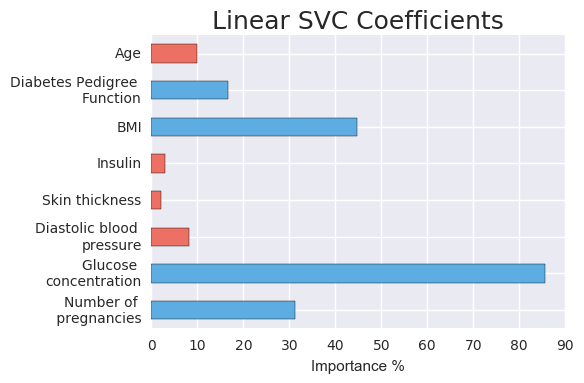

In [93]:
def f_importances(coef, names):
    imp = list(map(lambda x: abs(x) * 100, coef[0]))
    data = pd.DataFrame(imp, names)
    axes = data.plot(kind='barh', 
             color=['#ec7063' if ( row[0] <= 10 ) else '#5dade2' for name,row in data.iterrows()],
             legend = False,
             title = "Linear SVC Coefficients")
    'num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age'
    axes.yaxis.set_ticklabels([
     'Number of \n pregnancies',
     'Glucose \nconcentration',
     'Diastolic blood \npressure',
     'Skin thickness',
     'Insulin',
     'BMI',
     'Diabetes Pedigree \nFunction',
     'Age'
     ])
    
    axes.set_xlabel("Importance %")
    axes.title.set_size(18)
    plt.tight_layout()
    plt.savefig("importance.png")
    plt.show()

f_importances(model.coef_, feature_col_names)

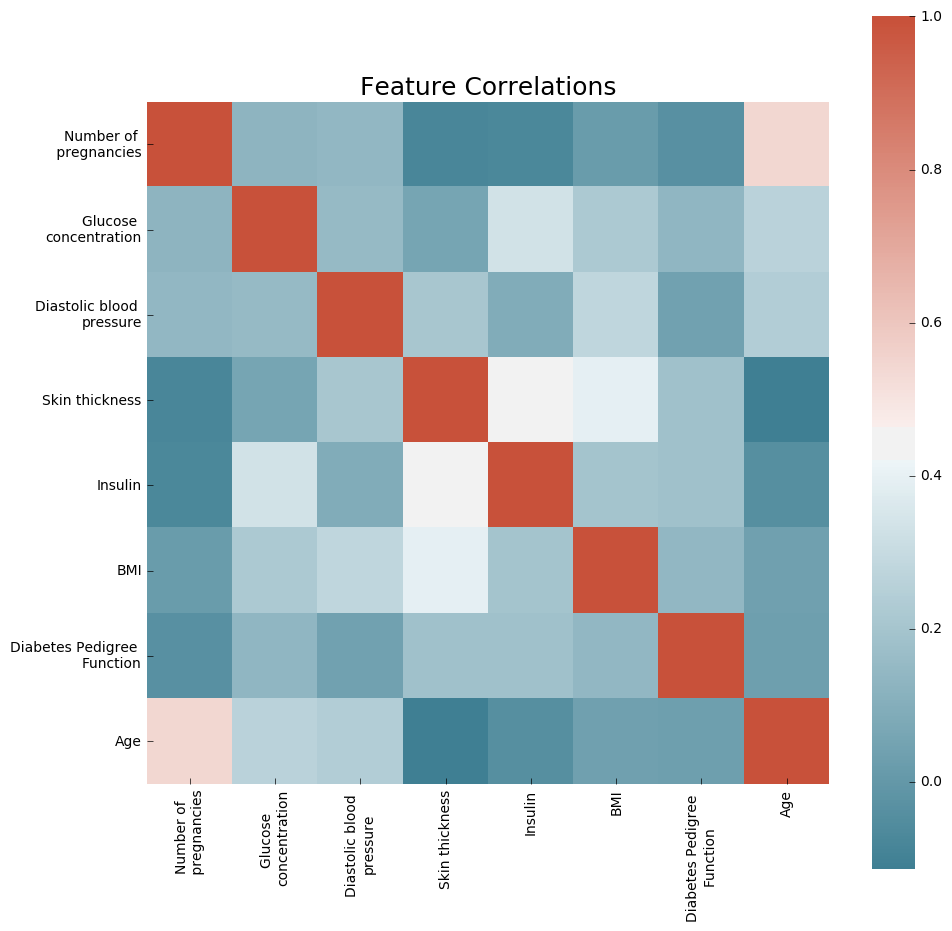

In [104]:
def plot_corr(df, size):
    corr= df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    xticklabels = ([
     'Number of \n pregnancies',
     'Glucose \nconcentration',
     'Diastolic blood \npressure',
     'Skin thickness',
     'Insulin',
     'BMI',
     'Diabetes Pedigree \nFunction',
     'Age'
     ])
    yticklabels = ([
     'Number of \n pregnancies',
     'Glucose \nconcentration',
     'Diastolic blood \npressure',
     'Skin thickness',
     'Insulin',
     'BMI',
     'Diabetes Pedigree \nFunction',
     'Age'
     ])
    ax = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 18, as_cmap=True),
            square=True, ax=ax, yticklabels=yticklabels, xticklabels=xticklabels)
    ax.set_title("Feature Correlations")
    ax.title.set_size(18)
plt.savefig("correlation.png")
plt.show()
sns.reset_orig()
plot_corr(df[feature_col_names],11)